imported
loaded


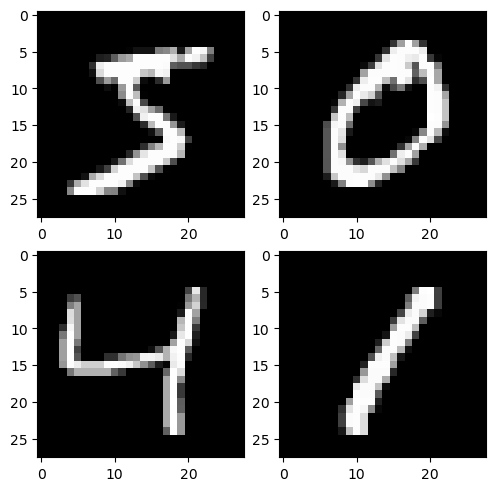

In [1]:
from glio.importsall import *
from glio.datasets import MNIST
print('imported')
dstrain, dstest = MNIST.get_mnist_classification()
print('loaded')
dstrain.preview()

In [2]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1 = ConvBlock(1, 64, 4, 1, act=nn.ReLU(), pool=nn.MaxPool2d(2,2))
        self.c2 = ConvBlock(64, 128, 3, 1, act=nn.ReLU(), pool=nn.MaxPool2d(2, 2))
        self.c3 = ConvBlock(128, 256, 2, 1, act=nn.ReLU(), pool=nn.MaxPool2d(2, 2))
        self.linear = LinearBlock(256*3*3, 10, act=nn.Softmax(dim=1), flatten=True)
    
    def forward(self,x):
        x = self.c1(x)
        x = self.c2(x)
        x = self.c3(x)
        x = self.linear(x)
        return x


print(f'{count_parameters(CNN()) = }')
gsummary(CNN(), (1, 1, 28,28))

count_parameters(CNN()) = 229322
path                                         module                                       input size               output size              params    buffers   
__main__.CNN/c1/0                            torch.nn.modules.conv.Conv2d                 (1, 1, 28, 28)           (1, 64, 29, 29)          1088      0         
__main__.CNN/c1/1                            torchzero.nn.layers.crop.SpatialReduceCrop   (1, 64, 29, 29)          (1, 64, 28, 28)          0         0         
__main__.CNN/c1/2                            torch.nn.modules.pooling.MaxPool2d           (1, 64, 28, 28)          (1, 64, 14, 14)          0         0         
__main__.CNN/c1/3                            torch.nn.modules.activation.ReLU             (1, 64, 14, 14)          (1, 64, 14, 14)          0         0         
__main__.CNN/c2/0                            torch.nn.modules.conv.Conv2d                 (1, 64, 14, 14)          (1, 128, 14, 14)         73856     0         
_

# SPSA
why does it go up

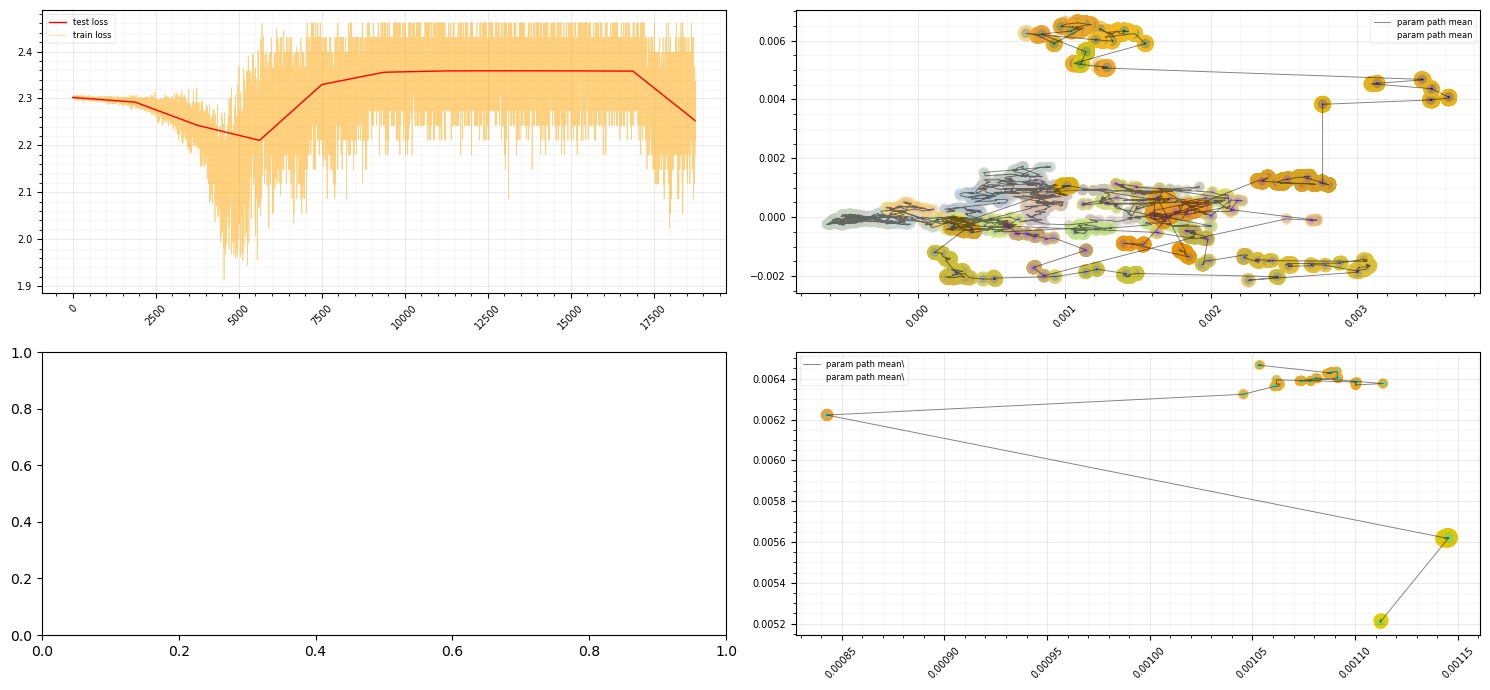

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉     | 10/10 | 47.09s/ops, elapsed: 07m:03s, rem: 47.09s | 

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 313/313 | 246.64ops/s, elapsed: 1.26s, rem: 4ms | 
train loss:                              last = 2.305, min = 1.913, max = 2.461
test loss:                               last = 2.358, min = 2.211, max = 2.359

| metric | n | min | max | first | last |
| :- | :- | :- | :- | :- | :- |
| last updates std | 18749 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| lr | 18750 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| param max | 18750 | 0.2501 | 2.5424 | 0.2504 | 2.5411 |
| param mean | 18750 | -0.0005 | 0.0003 | 0.0001 | 0.0003 |
| param min | 18750 | -2.0588 | -0.2495 | -0.2498 | -2.0588 |
| param var | 18750 | 0.0007 | 0.2287 | 0.0007 | 0.2287 |
| train loss | 18750 | 1.9127 | 2.4612 | 2.3014 | 2.3049 |
| test loss | 11 | 2.2108 | 2.3590 | 2.3022 | 2.2529 |
| test loss max | 11 | 2.3068 | 2.4612 | 2.3073 | 2.4299 |
| test loss median | 11 | 2.2198 | 2.3674 | 2.3022 | 2.2737 |
| test loss min | 11 | 1.9514 | 2.2972 | 2.2972 | 2.0549 |
| time | 18750 | 1.8791 | 469.4787 | 1.8791 | 469.4787 |
| update angle | 18750 | 0.0000 | 0.3644 | 0.0169 | 0.0000 |
| update var | 18750 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |


In [3]:
from torchzero.optim.zeroth_order import SPSA
with seeded_rng(): MODEL = CNN()
MAGN = 1e-5
LR = 1e-3
BATCH_SIZE = 32
N_EPOCHS = 10
LOSS_FN = nn.CrossEntropyLoss()
METRIC_STEP = 1

with seeded_rng():
    DLTRAIN = DataLoader(dstrain, BATCH_SIZE, shuffle=True, **seed0_kwargs)
    DLTEST = DataLoader(dstest, BATCH_SIZE, shuffle=False, **seed0_kwargs)

OPT = SPSA(MODEL.parameters(), lr = LR, magn=MAGN, foreach=False)
#SCHED = lr_scheduler.CosineAnnealingLR(OPT, N_EPOCHS)
SCHED = None

CALLBACKS = (LogLossCB(),

            SaveForwardChannelImagesCB(dstest[0][0].unsqueeze(0)),

            LogParamDistCB(METRIC_STEP),
            LogParamPathCB(METRIC_STEP),
            LogUpdateDistCB(METRIC_STEP),
            LogUpdatePathCB(METRIC_STEP),
            LogLastUpdatesAngleCB(METRIC_STEP),
            #Log_GradDist(METRIC_STEP),
            #Log_GradUpdateAngle(METRIC_STEP),
            #Log_GradPath(METRIC_STEP),
            #Log_LastGradsAngle(METRIC_STEP),
            LogTimeCB(),
            LogLRCB(),
            LogOptimizerParamCB('magn'),
            DisplayLoggerTableCB(),
            AccelerateCB("no"),
            PerformanceTweaksCB(True),
            SaveLastCB(),
            LivePlotCB(1000, plot_keys = ("4plotsplot","10metrics01"),path_keys=("4plotspath250",)),
            SimpleProgressBarCB(),
            GradientFreeWithZeroGradCB(),
            OneBatchClosureWithNoBackwardCB(),
              )
clean_mem()

# MODEL = gnn.LSUV(MODEL, DLTRAIN, max_iter=5)

LEARNER_NAME = f"SPSA lr{LR:.0e} magn{MAGN:.0e}"
learner = Learner(MODEL, LEARNER_NAME, CALLBACKS, loss_fn=LOSS_FN, optimizer=OPT, scheduler=SCHED, )
learner.fit(N_EPOCHS, DLTRAIN, DLTEST,test_on_interrupt=False)

# SPSA foreach implementation
Should be a bit faster but most time is used by the CNN.

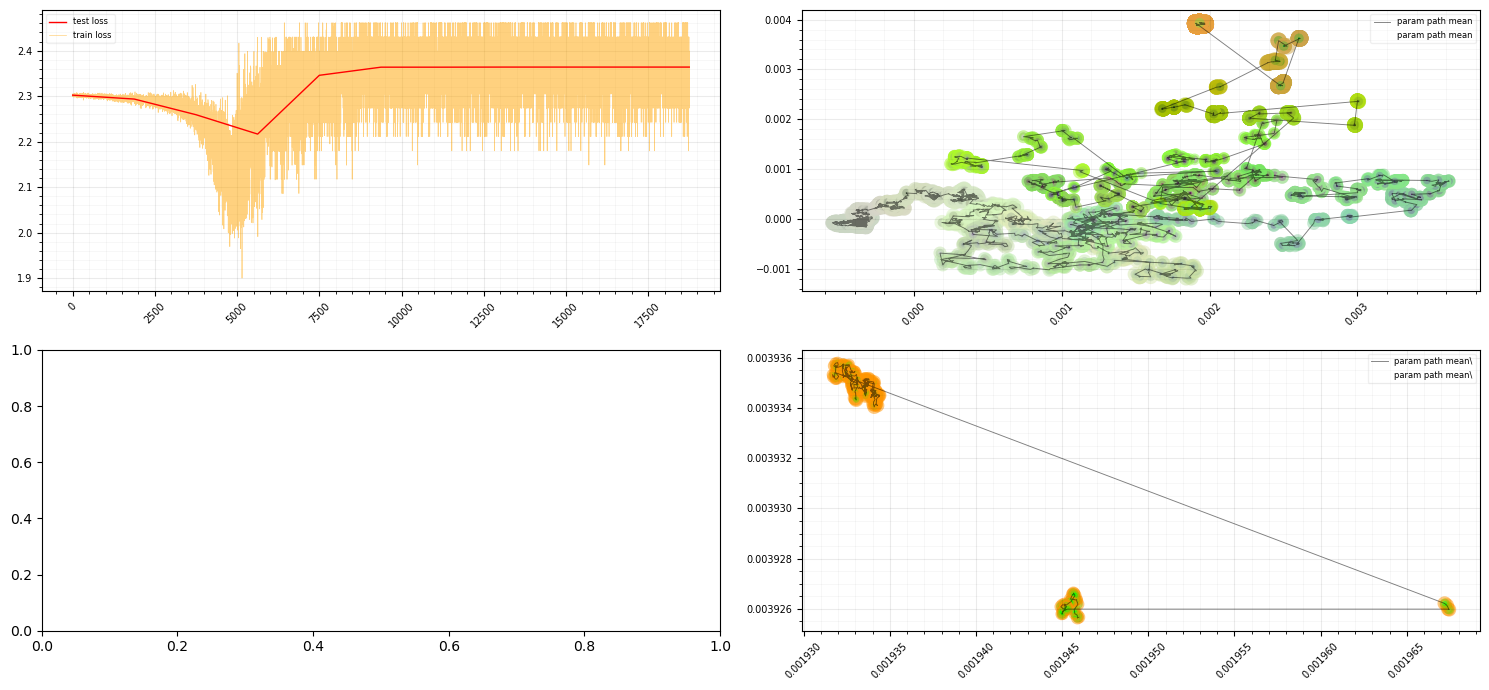

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉     | 10/10 | 42.83s/ops, elapsed: 06m:25s, rem: 42.83s | 

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 313/313 | 240.96ops/s, elapsed: 1.29s, rem: 4ms | 
train loss:                              last = 2.399, min = 1.900, max = 2.461
test loss:                               last = 2.364, min = 2.217, max = 2.364

| metric | n | min | max | first | last |
| :- | :- | :- | :- | :- | :- |
| last updates std | 18749 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| lr | 18750 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| param max | 18750 | 0.2499 | 1.3773 | 0.2499 | 1.3735 |
| param mean | 18750 | -0.0001 | 0.0014 | 0.0001 | 0.0014 |
| param min | 18750 | -1.4534 | -0.2496 | -0.2500 | -1.4524 |
| param var | 18750 | 0.0007 | 0.1213 | 0.0007 | 0.1213 |
| train loss | 18750 | 1.9002 | 2.4612 | 2.3014 | 2.3987 |
| test loss | 11 | 2.2166 | 2.3638 | 2.3022 | 2.3638 |
| test loss max | 11 | 2.3056 | 2.4612 | 2.3073 | 2.4612 |
| test loss median | 11 | 2.2169 | 2.3674 | 2.3022 | 2.3674 |
| test loss min | 11 | 2.0197 | 2.2972 | 2.2972 | 2.2112 |
| time | 18750 | 2.5257 | 430.4314 | 2.5257 | 430.4314 |
| update angle | 18750 | 0.0000 | 0.3547 | 0.0004 | 0.0000 |
| update var | 18750 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |


In [3]:
from torchzero.optim.zeroth_order import SPSA
with seeded_rng(): MODEL = CNN()
MAGN = 1e-5
LR = 1e-3
BATCH_SIZE = 32
N_EPOCHS = 10
LOSS_FN = nn.CrossEntropyLoss()
METRIC_STEP = 1

with seeded_rng():
    DLTRAIN = DataLoader(dstrain, BATCH_SIZE, shuffle=True, **seed0_kwargs)
    DLTEST = DataLoader(dstest, BATCH_SIZE, shuffle=False, **seed0_kwargs)

OPT = SPSA(MODEL.parameters(), lr = LR, magn=MAGN, foreach=True)
#SCHED = lr_scheduler.CosineAnnealingLR(OPT, N_EPOCHS)
SCHED = None

CALLBACKS = (LogLossCB(),

            SaveForwardChannelImagesCB(dstest[0][0].unsqueeze(0)),

            LogParamDistCB(METRIC_STEP),
            LogParamPathCB(METRIC_STEP),
            LogUpdateDistCB(METRIC_STEP),
            LogUpdatePathCB(METRIC_STEP),
            LogLastUpdatesAngleCB(METRIC_STEP),
            #Log_GradDist(METRIC_STEP),
            #Log_GradUpdateAngle(METRIC_STEP),
            #Log_GradPath(METRIC_STEP),
            #Log_LastGradsAngle(METRIC_STEP),
            LogTimeCB(),
            LogLRCB(),
            LogOptimizerParamCB('magn'),
            DisplayLoggerTableCB(),
            AccelerateCB("no"),
            PerformanceTweaksCB(True),
            SaveLastCB(),
            LivePlotCB(1000, plot_keys = ("4plotsplot","10metrics01"),path_keys=("4plotspath250",)),
            SimpleProgressBarCB(),
            GradientFreeWithZeroGradCB(),
            OneBatchClosureWithNoBackwardCB(),
              )
clean_mem()

# MODEL = gnn.LSUV(MODEL, DLTRAIN, max_iter=5)

LEARNER_NAME = f"SPSA foreach lr{LR:.0e} magn{MAGN:.0e}"
learner = Learner(MODEL, LEARNER_NAME, CALLBACKS, loss_fn=LOSS_FN, optimizer=OPT, scheduler=SCHED, )
learner.fit(N_EPOCHS, DLTRAIN, DLTEST,test_on_interrupt=False)

# SPSA - The Old Implementation
This one is the slowest yet it manages to use more memory

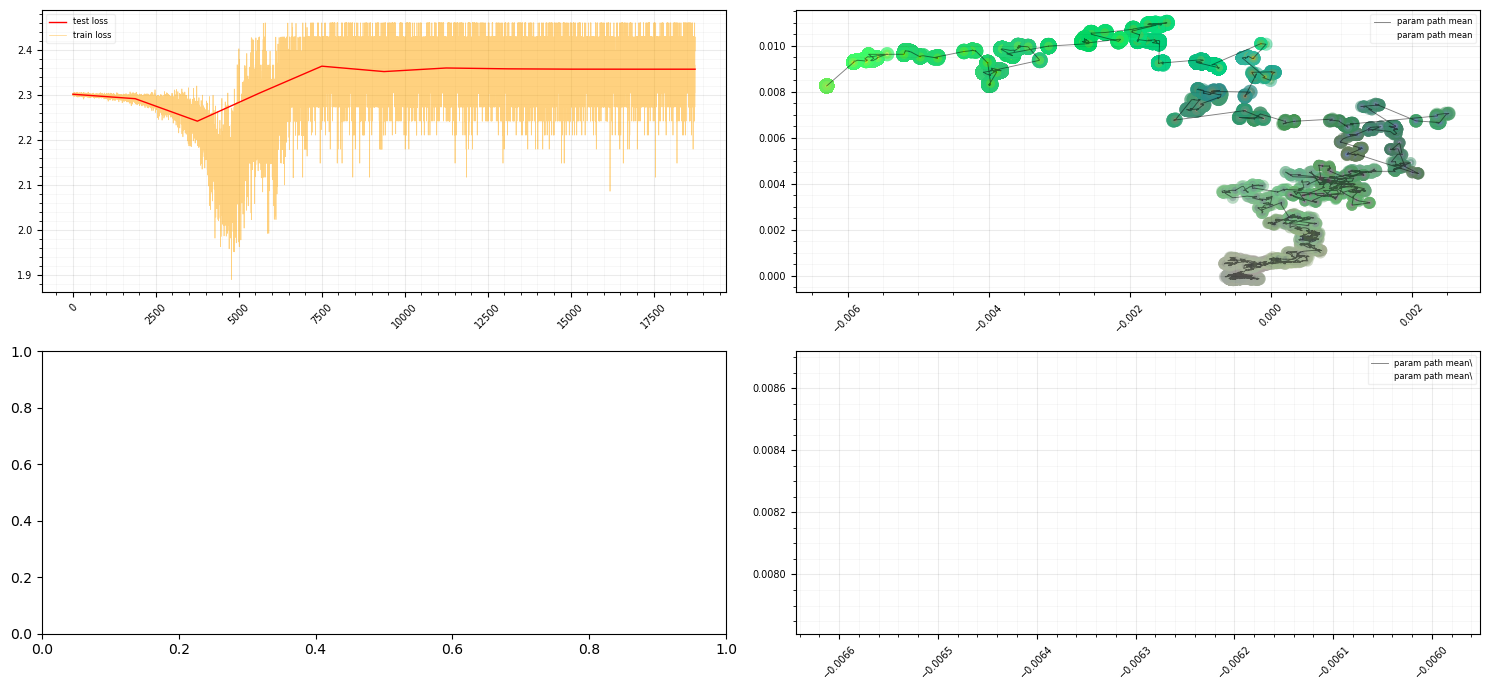

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉     | 10/10 | 51.30s/ops, elapsed: 07m:41s, rem: 51.30s | 

▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉▉| 313/313 | 231.89ops/s, elapsed: 1.35s, rem: 4ms | 
train loss:                              last = 2.399, min = 1.890, max = 2.461
test loss:                               last = 2.358, min = 2.242, max = 2.365

| metric | n | min | max | first | last |
| :- | :- | :- | :- | :- | :- |
| last updates std | 18749 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| lr | 18750 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |
| param max | 18750 | 0.2502 | 1.9997 | 0.2503 | 1.9287 |
| param mean | 18750 | -0.0003 | 0.0010 | 0.0001 | 0.0000 |
| param min | 18750 | -2.3587 | -0.2495 | -0.2498 | -2.2836 |
| param var | 18750 | 0.0007 | 0.2150 | 0.0007 | 0.2150 |
| train loss | 18750 | 1.8896 | 2.4612 | 2.3014 | 2.3987 |
| test loss | 11 | 2.2422 | 2.3646 | 2.3022 | 2.3579 |
| test loss max | 11 | 2.3073 | 2.4612 | 2.3073 | 2.4612 |
| test loss median | 11 | 2.2447 | 2.3674 | 2.3022 | 2.3674 |
| test loss min | 11 | 2.1096 | 2.2972 | 2.2972 | 2.1799 |
| time | 18750 | 2.2645 | 521.2829 | 2.2645 | 521.2829 |
| update angle | 18750 | 0.0000 | 0.3127 | 0.0165 | 0.0000 |
| update var | 18750 | 0.0000 | 0.0000 | 0.0000 | 0.0000 |


In [3]:
from torchzero.optim.zeroth_order.old.spsa import SPSA
with seeded_rng(): MODEL = CNN()
MAGN = 1e-5
LR = 1e-3
BATCH_SIZE = 32
N_EPOCHS = 10
LOSS_FN = nn.CrossEntropyLoss()
METRIC_STEP = 1

with seeded_rng():
    DLTRAIN = DataLoader(dstrain, BATCH_SIZE, shuffle=True, **seed0_kwargs)
    DLTEST = DataLoader(dstest, BATCH_SIZE, shuffle=False, **seed0_kwargs)

OPT = SPSA(MODEL.parameters(), lr = LR, magn=MAGN)
#SCHED = lr_scheduler.CosineAnnealingLR(OPT, N_EPOCHS)
SCHED = None

CALLBACKS = (LogLossCB(),

            SaveForwardChannelImagesCB(dstest[0][0].unsqueeze(0)),

            LogParamDistCB(METRIC_STEP),
            LogParamPathCB(METRIC_STEP),
            LogUpdateDistCB(METRIC_STEP),
            LogUpdatePathCB(METRIC_STEP),
            LogLastUpdatesAngleCB(METRIC_STEP),
            #Log_GradDist(METRIC_STEP),
            #Log_GradUpdateAngle(METRIC_STEP),
            #Log_GradPath(METRIC_STEP),
            #Log_LastGradsAngle(METRIC_STEP),
            LogTimeCB(),
            LogLRCB(),
            LogOptimizerParamCB('magn'),
            DisplayLoggerTableCB(),
            AccelerateCB("no"),
            PerformanceTweaksCB(True),
            SaveLastCB(),
            LivePlotCB(1000, plot_keys = ("4plotsplot","10metrics01"),path_keys=("4plotspath250",)),
            SimpleProgressBarCB(),
            GradientFreeWithZeroGradCB(),
            OneBatchClosureWithNoBackwardCB(),
              )
clean_mem()

# MODEL = gnn.LSUV(MODEL, DLTRAIN, max_iter=5)

LEARNER_NAME = f"SPSA foreach lr{LR:.0e} magn{MAGN:.0e}"
learner = Learner(MODEL, LEARNER_NAME, CALLBACKS, loss_fn=LOSS_FN, optimizer=OPT, scheduler=SCHED, )
learner.fit(N_EPOCHS, DLTRAIN, DLTEST,test_on_interrupt=False)